In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

import seaborn as sns
import random

import sys
from Bio import Entrez

from scipy.stats import chisquare
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

from itertools import cycle

#import SeabornFig2Grid as sfg
import matplotlib.gridspec as gridspec

In [2]:
driver_map_data_all_df = pd.read_csv('../Data/DriverMapTPM.tsv',delimiter='\t')
driver_map_data_all_df = driver_map_data_all_df.set_index('Unnamed: 0')
driver_map_data_all_df.index.names = ['target']
# columns: 
#['A10', 'A11', 'A12', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 
# 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']
"""
# subtract values of negative control from all samples
# not the most pyrhonic way, meh...
driver_map_data_all_df['A2'] = (driver_map_data_all_df['A2']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A3'] = (driver_map_data_all_df['A3']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A4'] = (driver_map_data_all_df['A4']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A5'] = (driver_map_data_all_df['A5']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A6'] = (driver_map_data_all_df['A6']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A7'] = (driver_map_data_all_df['A7']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A8'] = (driver_map_data_all_df['A8']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A9'] = (driver_map_data_all_df['A9']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A10'] = (driver_map_data_all_df['A10']-driver_map_data_all_df['A12'])
driver_map_data_all_df['A12'] = (driver_map_data_all_df['A11']-driver_map_data_all_df['A12'])

driver_map_data_all_df['B2'] = (driver_map_data_all_df['B2']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B3'] = (driver_map_data_all_df['B3']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B4'] = (driver_map_data_all_df['B4']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B5'] = (driver_map_data_all_df['B5']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B6'] = (driver_map_data_all_df['B6']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B7'] = (driver_map_data_all_df['B7']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B8'] = (driver_map_data_all_df['B8']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B9'] = (driver_map_data_all_df['B9']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B10'] = (driver_map_data_all_df['B10']-driver_map_data_all_df['B12'])
driver_map_data_all_df['B12'] = (driver_map_data_all_df['B11']-driver_map_data_all_df['B12'])
"""

driver_map_data_all_df.head()

A10       A11     A12         A2         A3         A4  \
target                                                                     
14266|CENPU  17.60490  23.53280   0.000   0.294876   43.10860   70.50920   
13331|PEX14  19.08750  14.08670   0.000  27.671900   25.00070   17.33890   
6630|RAD52    3.66106   4.29017   0.000   5.274080    6.98958    3.28098   
16802|CLYBL  11.47500  12.58540  34.475  16.894700   14.28180    4.92852   
6645|RANBP1  71.64050  79.22280   0.000  45.997900  218.58800  143.56100   

                   A5        A6        A7        A8  ...       B11       B12  \
target                                               ...                       
14266|CENPU  21.41510   1.14305  47.16210   1.43697  ...  20.49390   0.00000   
13331|PEX14  25.84810  12.43200  18.08010  10.52050  ...  17.62190   0.00000   
6630|RAD52    4.90895   1.53928   5.35737   1.73986  ...   6.29135   3.60232   
16802|CLYBL  30.36700  28.94250  15.52040   7.25044  ...   9.44277  38.90040   
6645|RANBP1  82.09650  30.95460  70.32010  51.50090  ...  66.10810   7.38547   

                    B2        B3        B4        B5        B6        B7  \
target                                                                     
14266|CENPU   0.546198   48.0853  74.59220  26.27370   1.19616  45.71820   
13331|PEX14  33.521000   26.2342  24.65790  36.15540  15.84860  18.20870   
6630|RAD52    7.170180   10.8381   6.08676   6.61974   3.46454   7.99667   
16802|CLYBL  11.170000   12.2971   4.87524  24.46830  21.38690  12.00770   
6645|RANBP1  35.480200  105.3570  93.05350  46.65610  24.73280  47.38680   

                   B8        B9  
target                           
14266|CENPU   2.83643  122.2470  
13331|PEX14  14.82460   34.4379  
6630|RAD52    2.27730    8.2883  
16802|CLYBL   3.81662   16.9272  
6645|RANBP1  41.90630  118.2290  

[5 rows x 22 columns]

In [3]:
# get log2 values for all DriverMap Samples and save to separate df
with np.errstate(divide='ignore'):
    driver_map_data_all_log_df = np.log2(driver_map_data_all_df)
# replace negative values with 0    
driver_map_data_all_log_df[driver_map_data_all_log_df < 0 ] = 0
# repleca NaN values  with 0
driver_map_data_all_log_df[driver_map_data_all_log_df.isna() ] = 0

# rename column to sample names + sample_BSA
driver_map_data_all_log_df = driver_map_data_all_log_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 
                                                'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_all_log_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67',
                                 'Brain_BSA', 'Univ Stratagene_BSA', 'Univ DriverMap_BSA','Univ Clontech_BSA', 'Univ BioChain_BSA', 
                              'Univ Rare_BSA', 'WB-Activated_BSA','WB-Disease_BSA', 'Univ ImmuneT10_BSA', 'Hemat System3_BSA', 'NegC_B67_BSA']

driver_map_data_all_log_df.head()

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
target                                                                  
14266|CENPU  0.000000         5.429904        6.139740       4.420557   
13331|PEX14  4.790350         4.643897        4.115940       4.691986   
6630|RAD52   2.398919         2.805206        1.714127       2.295414   
16802|CLYBL  4.078499         3.836106        2.301154       4.924432   
6645|RANBP1  5.523496         7.772070        7.165520       6.359249   

             Univ BioChain  Univ Rare  WB-Activated  WB-Disease  \
target                                                            
14266|CENPU       0.192889   5.559556      0.523030    6.599373   
13331|PEX14       3.635987   4.176331      3.395131    4.872642   
6630|RAD52        0.622256   2.421525      0.798971    2.298957   
16802|CLYBL       4.855118   3.956094      2.858069    4.201626   
6645|RANBP1       4.952082   6.135865      5.686526    7.072577   

             Univ ImmuneT10  Hemat System3  ...  Univ Stratagene_BSA  \
target                                      ...                        
14266|CENPU        4.137905       4.556601  ...             5.587524   
13331|PEX14        4.254556       3.816262  ...             4.713377   
6630|RAD52         1.872261       2.101035  ...             3.438040   
16802|CLYBL        3.520422       3.653679  ...             3.620246   
6645|RANBP1        6.162704       6.307844  ...             6.719142   

             Univ DriverMap_BSA  Univ Clontech_BSA  Univ BioChain_BSA  \
target                                                                  
14266|CENPU            6.220953           4.715547           0.258410   
13331|PEX14            4.623978           5.176139           3.986283   
6630|RAD52             2.605674           2.726775           1.792664   
16802|CLYBL            2.285473           4.612842           4.418655   
6645|RANBP1            6.539989           5.543994           4.628354   

             Univ Rare_BSA  WB-Activated_BSA  WB-Disease_BSA  \
target                                                         
14266|CENPU       5.514697          1.504076        6.933655   
13331|PEX14       4.186556          3.889921        5.105925   
6630|RAD52        2.999399          1.187324        3.051076   
16802|CLYBL       3.585888          1.932296        4.081271   
6645|RANBP1       5.566413          5.389095        6.885440   

             Univ ImmuneT10_BSA  Hemat System3_BSA  NegC_B67_BSA  
target                                                            
14266|CENPU            3.763751           4.357123      0.000000  
13331|PEX14            4.458284           4.139298      0.000000  
6630|RAD52             2.889191           2.653370      1.848926  
16802|CLYBL            3.076800           3.239210      5.281713  
6645|RANBP1            5.352123           6.046755      2.884690  

[5 rows x 22 columns]

In [4]:
# create separate file for DriverMap Original Samples
driver_map_data_df = driver_map_data_all_df.iloc[::,]
driver_map_data_df = driver_map_data_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12']]
driver_map_data_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

driver_map_data_df.reset_index(drop=False)
driver_map_data_df.head()

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
target                                                                   
14266|CENPU   0.294876         43.10860        70.50920       21.41510   
13331|PEX14  27.671900         25.00070        17.33890       25.84810   
6630|RAD52    5.274080          6.98958         3.28098        4.90895   
16802|CLYBL  16.894700         14.28180         4.92852       30.36700   
6645|RANBP1  45.997900        218.58800       143.56100       82.09650   

             Univ BioChain  Univ Rare  WB-Activated  WB-Disease  \
target                                                            
14266|CENPU        1.14305   47.16210       1.43697    96.96370   
13331|PEX14       12.43200   18.08010      10.52050    29.29620   
6630|RAD52         1.53928    5.35737       1.73986     4.92102   
16802|CLYBL       28.94250   15.52040       7.25044    18.39990   
6645|RANBP1       30.95460   70.32010      51.50090   134.60400   

             Univ ImmuneT10  Hemat System3  NegC_B67  
target                                                
14266|CENPU        17.60490       23.53280     0.000  
13331|PEX14        19.08750       14.08670     0.000  
6630|RAD52          3.66106        4.29017     0.000  
16802|CLYBL        11.47500       12.58540    34.475  
6645|RANBP1        71.64050       79.22280     0.000

In [5]:
# take log2 of the original and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_log_df = np.log2(driver_map_data_df)

# replace negative values with 0    
driver_map_data_log_df[driver_map_data_log_df < 0 ] = 0
# repleca NaN values  with 0
driver_map_data_log_df[driver_map_data_log_df.isna() ] = 0

#flip axis
switch_driver_map_data_log_df=driver_map_data_log_df.transpose()

switch_driver_map_data_log_df.to_csv('../Outputs/DM_data_log_original.csv')
driver_map_data_log_df.describe()

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
count  18989.000000     18989.000000    18989.000000   18989.000000   
mean       3.303398         3.188368        3.052194       3.619161   
std        2.671991         2.652274        2.719164       2.446643   
min        0.000000         0.000000        0.000000       0.000000   
25%        0.228763         0.287638        0.000000       1.642133   
50%        3.363886         3.154074        2.942548       3.687845   
75%        5.359627         5.221169        5.153226       5.389577   
max       15.099557        13.344532       13.315348      13.558564   

       Univ BioChain     Univ Rare  WB-Activated    WB-Disease  \
count   18989.000000  18989.000000  18989.000000  18989.000000   
mean        2.473418      3.512247      2.509879      2.876089   
std         2.471288      2.461600      2.703281      2.780757   
min         0.000000      0.000000      0.000000      0.000000   
25%         0.000000      1.491602      0.000000      0.000000   
50%         2.055345      3.576329      1.743468      2.562851   
75%         4.184590      5.284540      4.519234      5.084013   
max        15.569598     13.873098     14.635486     13.637191   

       Univ ImmuneT10  Hemat System3      NegC_B67  
count    18989.000000   18989.000000  18989.000000  
mean         3.262681       2.953104      2.403717  
std          2.494558       2.558000      3.018241  
min          0.000000       0.000000      0.000000  
25%          1.003912       0.124169      0.000000  
50%          3.253971       2.803502      0.000000  
75%          5.054892       4.807824      5.516044  
max         14.502770      14.745118     17.756758

In [6]:
# Make DF for DriverMap for samples treated with BSA and 
driver_map_data_bsa_df = driver_map_data_all_df.iloc[::,-12:]
driver_map_data_bsa_df = driver_map_data_bsa_df[['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_bsa_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

#driver_map_data_bsa_df.reset_index(drop=False)

# convert DriverMap data into log2 functions and ignote devide by 0 error message
with np.errstate(divide='ignore'):
    driver_map_data_bsa_log_df = driver_map_data_bsa_df.apply(np.log2, reduce=None)

# replace negative values with 0    
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df < 0 ] = 0
# replace NaN values with 0  
driver_map_data_bsa_log_df[driver_map_data_bsa_log_df.isna() ] = 0

    
#flip axis
switch_driver_map_data_bsa_log_df=driver_map_data_bsa_log_df.transpose()

switch_driver_map_data_bsa_log_df.to_csv('../Outputs/DM_data_log_BSA.csv')
driver_map_data_bsa_log_df.describe()

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
count  18989.000000     18989.000000    18989.000000   18989.000000   
mean       3.252341         3.283858        3.120958       3.666521   
std        2.652588         2.655994        2.735125       2.460747   
min        0.000000         0.000000        0.000000       0.000000   
25%        0.172219         0.461822        0.000000       1.651890   
50%        3.298133         3.296883        3.073618       3.776725   
75%        5.295245         5.312008        5.251522       5.480443   
max       16.015493        12.968098       12.964945      14.101352   

       Univ BioChain     Univ Rare  WB-Activated    WB-Disease  \
count   18989.000000  18989.000000  18989.000000  18989.000000   
mean        2.519189      3.548107      2.515886      2.929115   
std         2.467091      2.457766      2.690458      2.786748   
min         0.000000      0.000000      0.000000      0.000000   
25%         0.000000      1.521840      0.000000      0.000000   
50%         2.153695      3.633640      1.802284      2.716969   
75%         4.250962      5.342608      4.505567      5.158200   
max        15.636018     14.509156     14.583547     13.243998   

       Univ ImmuneT10  Hemat System3      NegC_B67  
count    18989.000000   18989.000000  18989.000000  
mean         3.346877       3.087275      2.594155  
std          2.492429       2.563306      2.938701  
min          0.000000       0.000000      0.000000  
25%          1.109889       0.332473      0.000000  
50%          3.401712       3.036254      0.000000  
75%          5.164352       4.967634      5.526113  
max         15.196160      14.764224     17.968880

In [7]:
driver_map_data_all_df = driver_map_data_all_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 
                                                'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]
driver_map_data_all_df.columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67',
                                 'Brain_BSA', 'Univ Stratagene_BSA', 'Univ DriverMap_BSA','Univ Clontech_BSA', 'Univ BioChain_BSA', 
                              'Univ Rare_BSA', 'WB-Activated_BSA','WB-Disease_BSA', 'Univ ImmuneT10_BSA', 'Hemat System3_BSA', 'NegC_B67_BSA']



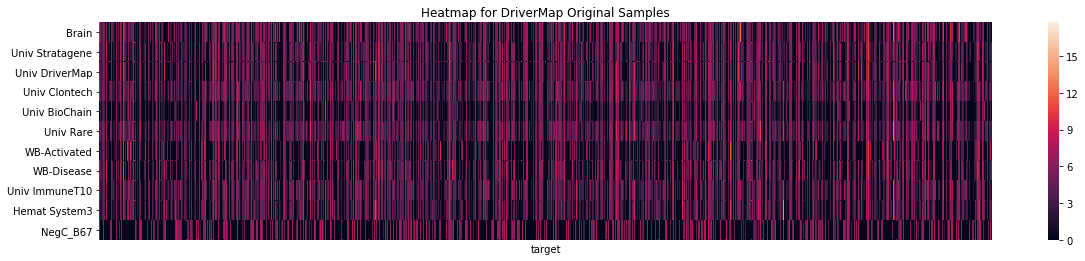

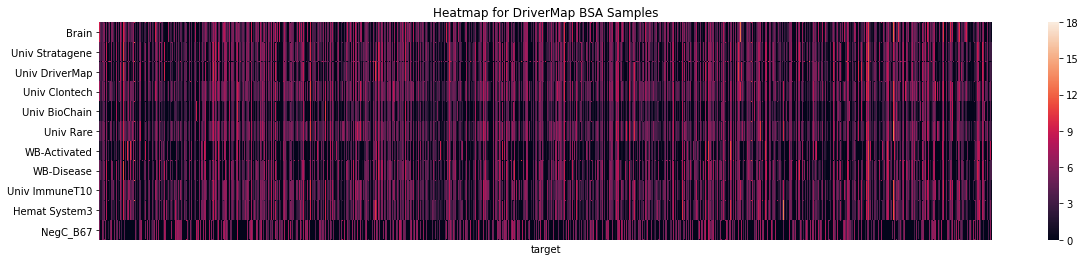

In [8]:
# make heatmap of DriverMap Original Samples
plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap Original Samples')
plt.savefig("Figures/heatmap_Original.png", dpi = 200)

# make heatmap of DriverMap BSA Samples
plt.figure(figsize=(20,4))
sns.heatmap(switch_driver_map_data_bsa_log_df,xticklabels=False,yticklabels=True)
plt.title('Heatmap for DriverMap BSA Samples')
plt.savefig("Figures/heatmap_BSA.png", dpi = 200)


In [9]:
# getting the list of genes
unique_genes_split = driver_map_data_df.index.str.split('|')
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]

#confirm that all gene names are unique
gene_name_list = [unique_genes_split[i][1] for i in range(len(unique_genes_split))]
len(np.unique(gene_name_list)) # 18989

# convert gene list to gene string separated by "," and export to file
gene_string = " ".join(str(x) for x in gene_name_list)
gene_string = gene_string.replace("[", "")
gene_string = gene_string.replace("]", ",")
gene_string = gene_string.replace("'", "")


In [10]:
bins = [-1,0,4,7,17]
bin_labels = ['no read','low','medium','high']

def bin_logs(df):
    
    # Make empty dictionary to fill with column cut in bins
    bin_data = {}
    # Make empty dictionary to fill with count of genes per bin
    bin_group = {}
    
    for i in list(df.columns):
        bin_data[i] = pd.cut(df[i],bins,labels=bin_labels)
    
    # Make temporary df with binned data
    bin_dataf = pd.DataFrame.from_dict(bin_data)
    
    # Make df with counts of gene grouped by bin
    for j in list(bin_dataf.columns):
        gr_count = bin_dataf.groupby(j)[j].count()
        bin_group[j] = gr_count
    
    return pd.DataFrame.from_dict(bin_group)

In [11]:
# rearrange samples original and BSA next to yeach other on big graph
driver_map_data_all_log_df = driver_map_data_all_log_df[['Brain', 'Brain_BSA',
                                         'Univ Stratagene', 'Univ Stratagene_BSA',
                                         'Univ DriverMap','Univ DriverMap_BSA',
                                         'Univ Clontech', 'Univ Clontech_BSA',
                                         'Univ BioChain', 'Univ BioChain_BSA',
                                         'Univ Rare', 'Univ Rare_BSA',
                                         'WB-Activated', 'WB-Activated_BSA',
                                         'WB-Disease', 'WB-Disease_BSA',
                                         'Univ ImmuneT10', 'Univ ImmuneT10_BSA',
                                         'Hemat System3', 'Hemat System3_BSA',
                                         'NegC_B67','NegC_B67_BSA']]

binned_all_dm_data = bin_logs(driver_map_data_all_log_df)
binned_all_dm_data

Brain  Brain_BSA  Univ Stratagene  Univ Stratagene_BSA  \
no read   4554       4576             4370                 4073   
low       6384       6553             7015                 6976   
medium    6349       6245             6023                 6261   
high      1702       1615             1581                 1679   

         Univ DriverMap  Univ DriverMap_BSA  Univ Clontech  Univ Clontech_BSA  \
no read            5439                5316           2516               2556   
low                6246                6088           7832               7584   
medium             5680                5903           7027               7153   
high               1624                1682           1614               1696   

         Univ BioChain  Univ BioChain_BSA  ...  WB-Activated  \
no read           5909               5738  ...          7029   
low               7888               7918  ...          6258   
medium            4300               4441  ...          4353   
high               892                892  ...          1349   

         WB-Activated_BSA  WB-Disease  WB-Disease_BSA  Univ ImmuneT10  \
no read              6897        6485            6336            3511   
low                  6405        5511            5515            8038   
medium               4388        5406            5477            6084   
high                 1299        1587            1661            1356   

         Univ ImmuneT10_BSA  Hemat System3  Hemat System3_BSA  NegC_B67  \
no read                3402           4606               4379     11042   
low                    7770           7768               7474      1069   
medium                 6396           5345               5801      5138   
high                   1421           1270               1335      1739   

         NegC_B67_BSA  
no read          9912  
low              1660  
medium           5967  
high             1449  

[4 rows x 22 columns]

In [12]:
binned_dm_data = bin_logs(driver_map_data_log_df)
binned_dm_data

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  Univ BioChain  \
no read   4554             4370            5439           2516           5909   
low       6384             7015            6246           7832           7888   
medium    6349             6023            5680           7027           4300   
high      1702             1581            1624           1614            892   

         Univ Rare  WB-Activated  WB-Disease  Univ ImmuneT10  Hemat System3  \
no read       2840          7029        6485            3511           4606   
low           7826          6258        5511            8038           7768   
medium        6827          4353        5406            6084           5345   
high          1496          1349        1587            1356           1270   

         NegC_B67  
no read     11042  
low          1069  
medium       5138  
high         1739

In [13]:
binned_bsa_data = bin_logs(driver_map_data_bsa_log_df)
binned_bsa_data

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  Univ BioChain  \
no read   4576             4073            5316           2556           5738   
low       6553             6976            6088           7584           7918   
medium    6245             6261            5903           7153           4441   
high      1615             1679            1682           1696            892   

         Univ Rare  WB-Activated  WB-Disease  Univ ImmuneT10  Hemat System3  \
no read       2765          6897        6336            3402           4379   
low           7779          6405        5515            7770           7474   
medium        6927          4388        5477            6396           5801   
high          1518          1299        1661            1421           1335   

         NegC_B67  
no read      9912  
low          1660  
medium       5967  
high         1449

In [14]:
def bin_logs_df(df):
    
    # Make empty dictionary to fill with column cut in bins
    bin_data = {}
    # Make empty dictionary to fill with count of genes per bin
    bin_group = {}
    
    for i in list(df.columns):
        bin_data[i] = pd.cut(df[i],bins,labels=bin_labels)
    
    # Make temporary df with binned data
    bin_dataf = pd.DataFrame.from_dict(bin_data)
    
    # Make df with counts of gene grouped by bin
#    for j in list(bin_dataf.columns):
#        gr_count = bin_dataf.groupby(j)[j].count()
#        bin_group[j] = gr_count
    
    return bin_dataf

bin_df = bin_logs_df(driver_map_data_all_log_df)

bin_df.head()
bin_df.index

Index(['14266|CENPU', '13331|PEX14', '6630|RAD52', '16802|CLYBL',
       '6645|RANBP1', '12149|KDF1', '11733|TBC1D30', '14535|TMEM258',
       '12400|LRG1', '11931|HYAL1',
       ...
       '16176|GAB3', '13299|ZNF701', '5706|NEB', '15110|ZNF775', '3181|CCNB2',
       '16735|BBS12', '14784|ANKRD27', '3464|COL19A1', '10238|TCTA',
       '10545|CA5A'],
      dtype='object', name='target', length=18989)

In [15]:
# get names of genes for the high expression

brain_high = bin_df.loc[bin_df['Brain'] == 'high'].index.to_list()
brain_index_high = []
grrr = [brain_index_high.append(i) for i in brain_high]

#brain_index_high # highly expressed gene count in brain is 1356

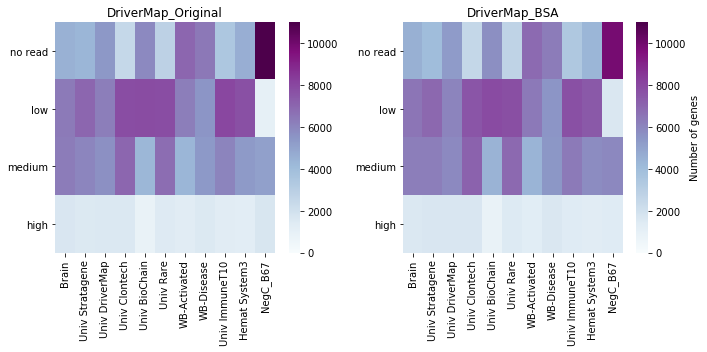

In [16]:
fig = plt.figure(figsize = (10,5)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(binned_dm_data, cmap = 'BuPu', ax = ax1, vmin=0, vmax=11000) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation = 0)
ax1.set_title('DriverMap_Original')
plt.savefig("Figures/heatmap_Original_bins.png", dpi = 200)

sns.heatmap(binned_bsa_data, cmap = 'BuPu', ax = ax2, vmin=0, vmax=11000, cbar_kws = {'label':'Number of genes'})
plt.setp(ax2.yaxis.get_majorticklabels(), rotation = 0)
ax2.set_title('DriverMap_BSA')
plt.savefig("Figures/heatmap_BSA_bins.png", dpi = 200)

plt.tight_layout()

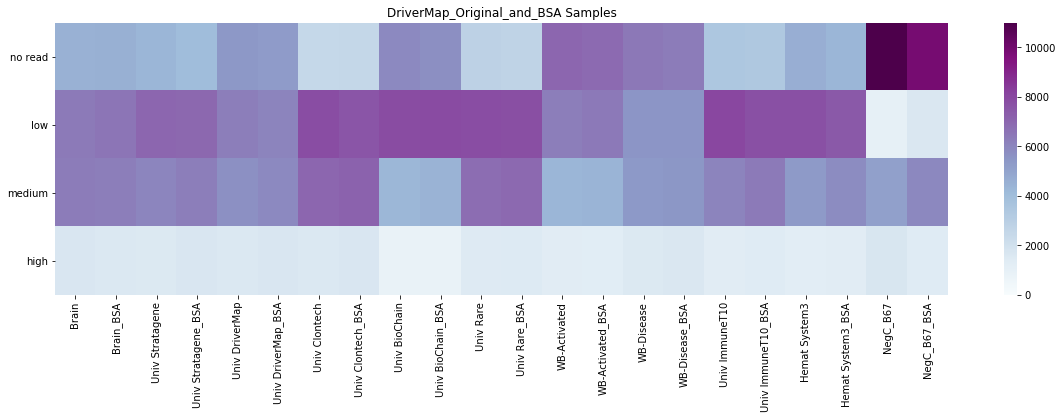

In [17]:
# create histogram plot with side by side comparison of original and BSA samples
fig = plt.figure(figsize = (20,5)) 
ax1 = fig.add_subplot(1, 1, 1) 

sns.heatmap(binned_all_dm_data, cmap = 'BuPu', ax = ax1, vmin=0, vmax=11000) 
plt.setp(ax1.yaxis.get_majorticklabels(), rotation = 0)
ax1.set_title('DriverMap_Original_and_BSA Samples')
plt.savefig("Figures/heatmap_Original_and_BSA.png", dpi = 200)

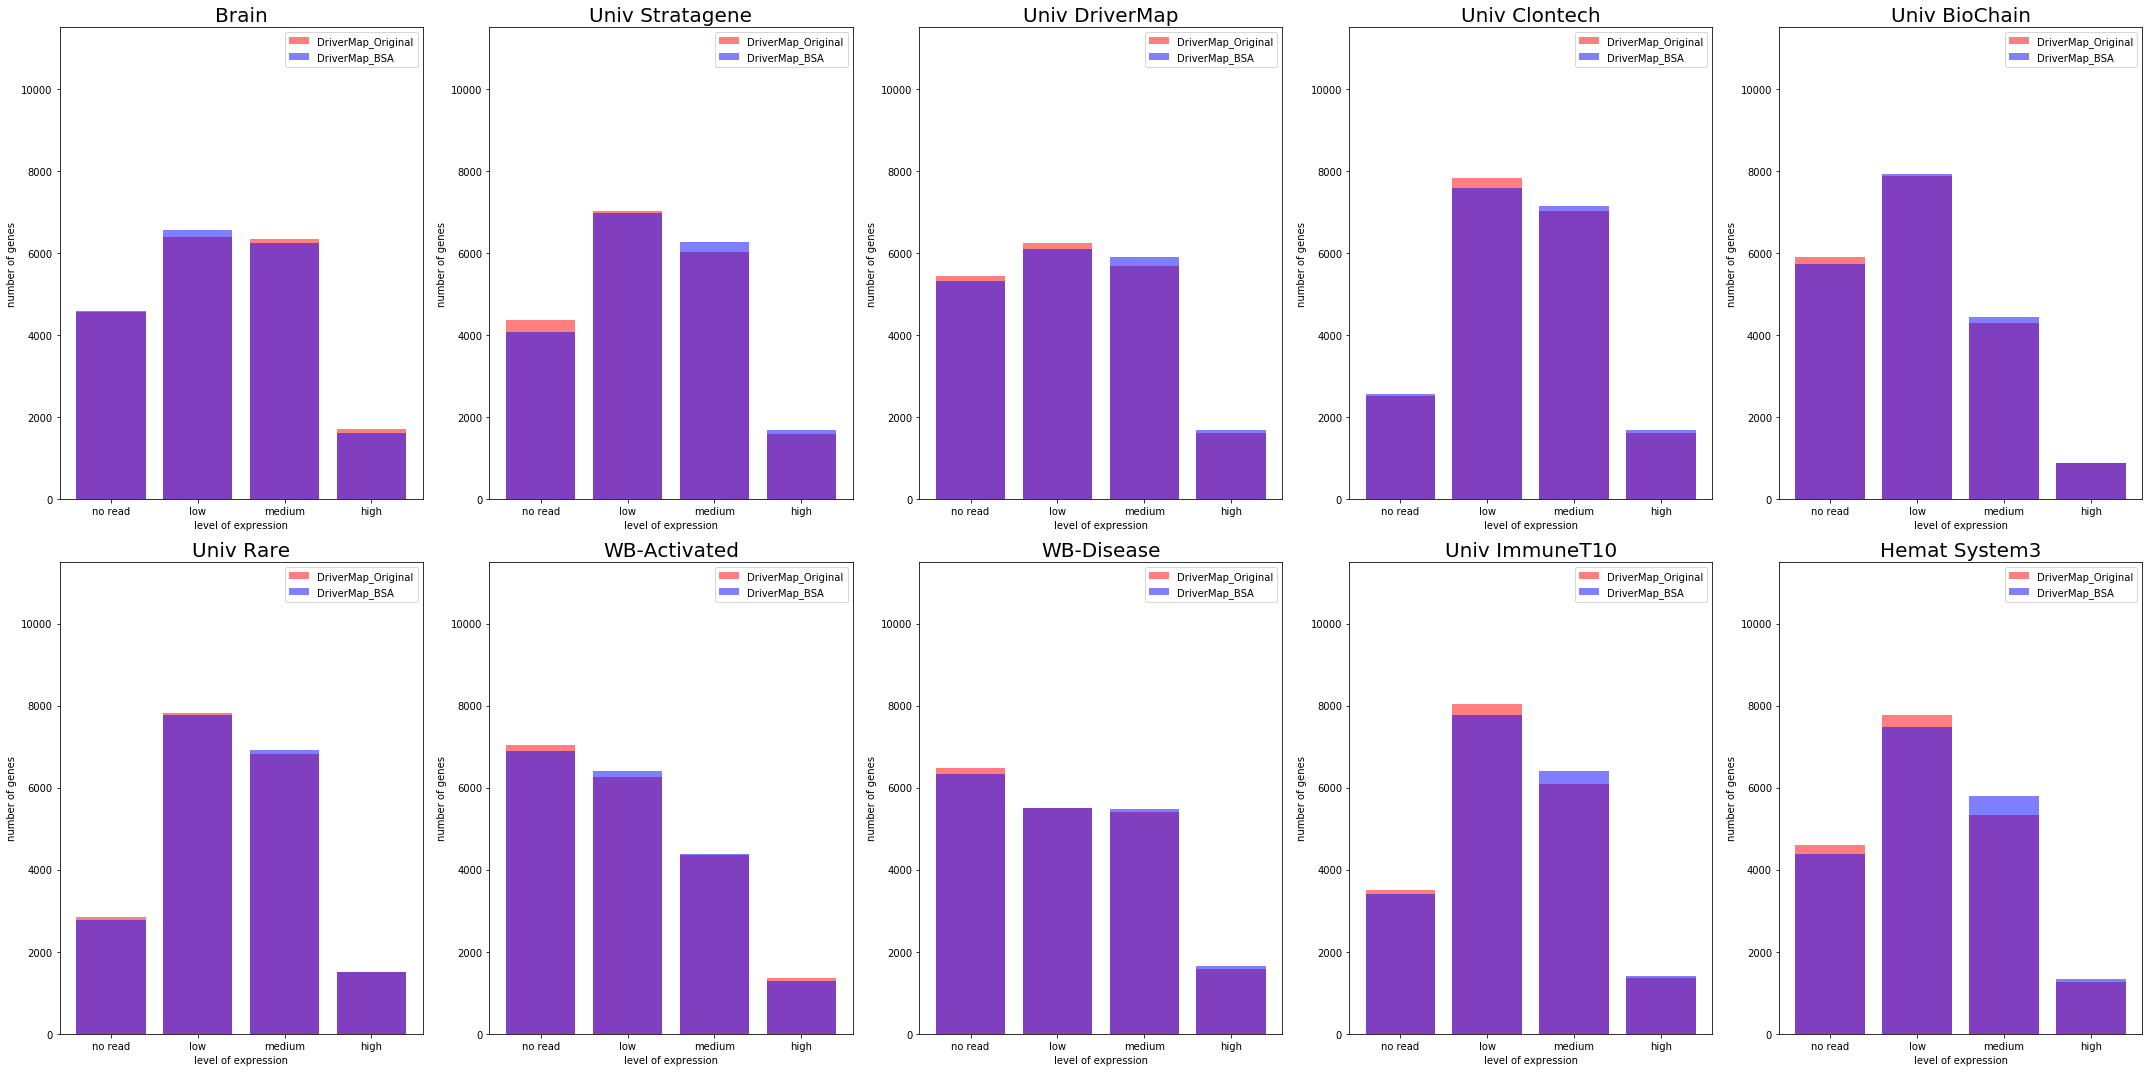

In [18]:
plt.figure(figsize=(30,15))

for i in range(10):
    title_font = {'size':'20'}
    plt.subplot(2,5,i+1)
    plt.bar(x = binned_dm_data.index, height = binned_dm_data.iloc[:,i], alpha=0.5, color='red',label='DriverMap_Original')
    plt.bar(x = binned_bsa_data.index, height = binned_bsa_data.iloc[:,i], alpha=0.5, color='blue',label='DriverMap_BSA')
    plt.title(binned_dm_data.columns[i],**title_font)
    plt.xlabel('level of expression')
    plt.ylabel('number of genes')
    plt.ylim(0, 11500)
    plt.legend()
    
plt.tight_layout()
plt.savefig("Figures/bars_Original_and_BSA.png", dpi = 200)

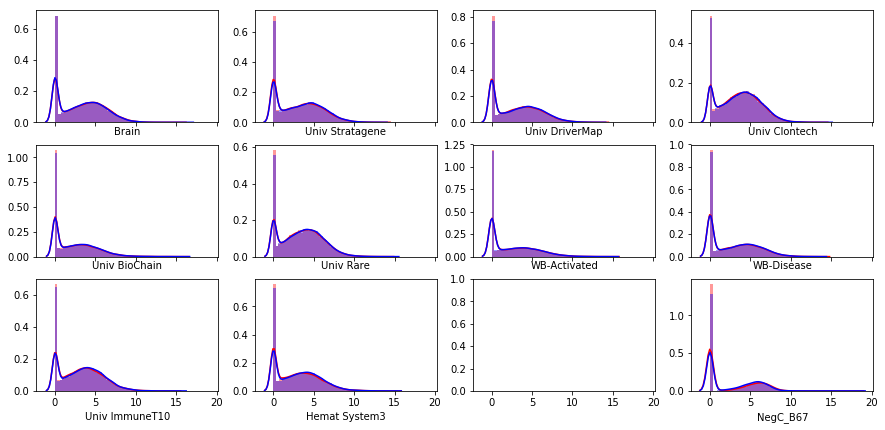

In [19]:
#This function combines the matplotlib hist function (with automatic calculation of a good default bin size) 
#with the seaborn kdeplot() and rugplot() functions. 
#It can also fit scipy.stats distributions and plot the estimated PDF over the data.
f, axes = plt.subplots(3, 4, figsize=(15, 7), sharex=True)

ax = sns.distplot( driver_map_data_log_df['Brain'] , color="red", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Brain'] , color="blue", ax=axes[0, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Stratagene'] , color="red", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Stratagene'] , color="blue", ax=axes[0, 1])
ax = sns.distplot( driver_map_data_log_df['Univ DriverMap'] , color="red", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ DriverMap'] , color="blue", ax=axes[0, 2])
ax = sns.distplot( driver_map_data_log_df['Univ Clontech'] , color="red", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Clontech'] , color="blue", ax=axes[0, 3])
ax = sns.distplot( driver_map_data_log_df['Univ BioChain'] , color="red", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ BioChain'] , color="blue", ax=axes[1, 0])
ax = sns.distplot( driver_map_data_log_df['Univ Rare'] , color="red", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ Rare'] , color="blue", ax=axes[1, 1])
ax = sns.distplot( driver_map_data_log_df['WB-Activated'] , color="red", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Activated'] , color="blue", ax=axes[1, 2])
ax = sns.distplot( driver_map_data_log_df['WB-Disease'] , color="red", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['WB-Disease'] , color="blue", ax=axes[1, 3])
ax = sns.distplot( driver_map_data_log_df['Univ ImmuneT10'] , color="red", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_bsa_log_df['Univ ImmuneT10'] , color="blue", ax=axes[2, 0])
ax = sns.distplot( driver_map_data_log_df['Hemat System3'] , color="red", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_bsa_log_df['Hemat System3'] , color="blue", ax=axes[2, 1])
ax = sns.distplot( driver_map_data_log_df['NegC_B67'] , color="red", ax=axes[2, 3])
ax = sns.distplot( driver_map_data_bsa_log_df['NegC_B67'] , color="blue", ax=axes[2, 3])

f.savefig("Figures/distplot_overlaps.png", dpi = 200)

In [20]:
# another possible way to normalize data

#log2df = np.log2(my_df)
#log2mean = log2df.mean(axis='columns')
#log_div_ave = log2df.subtract(log2mean, axis='index')



In [21]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

About PairGrid Plots
The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

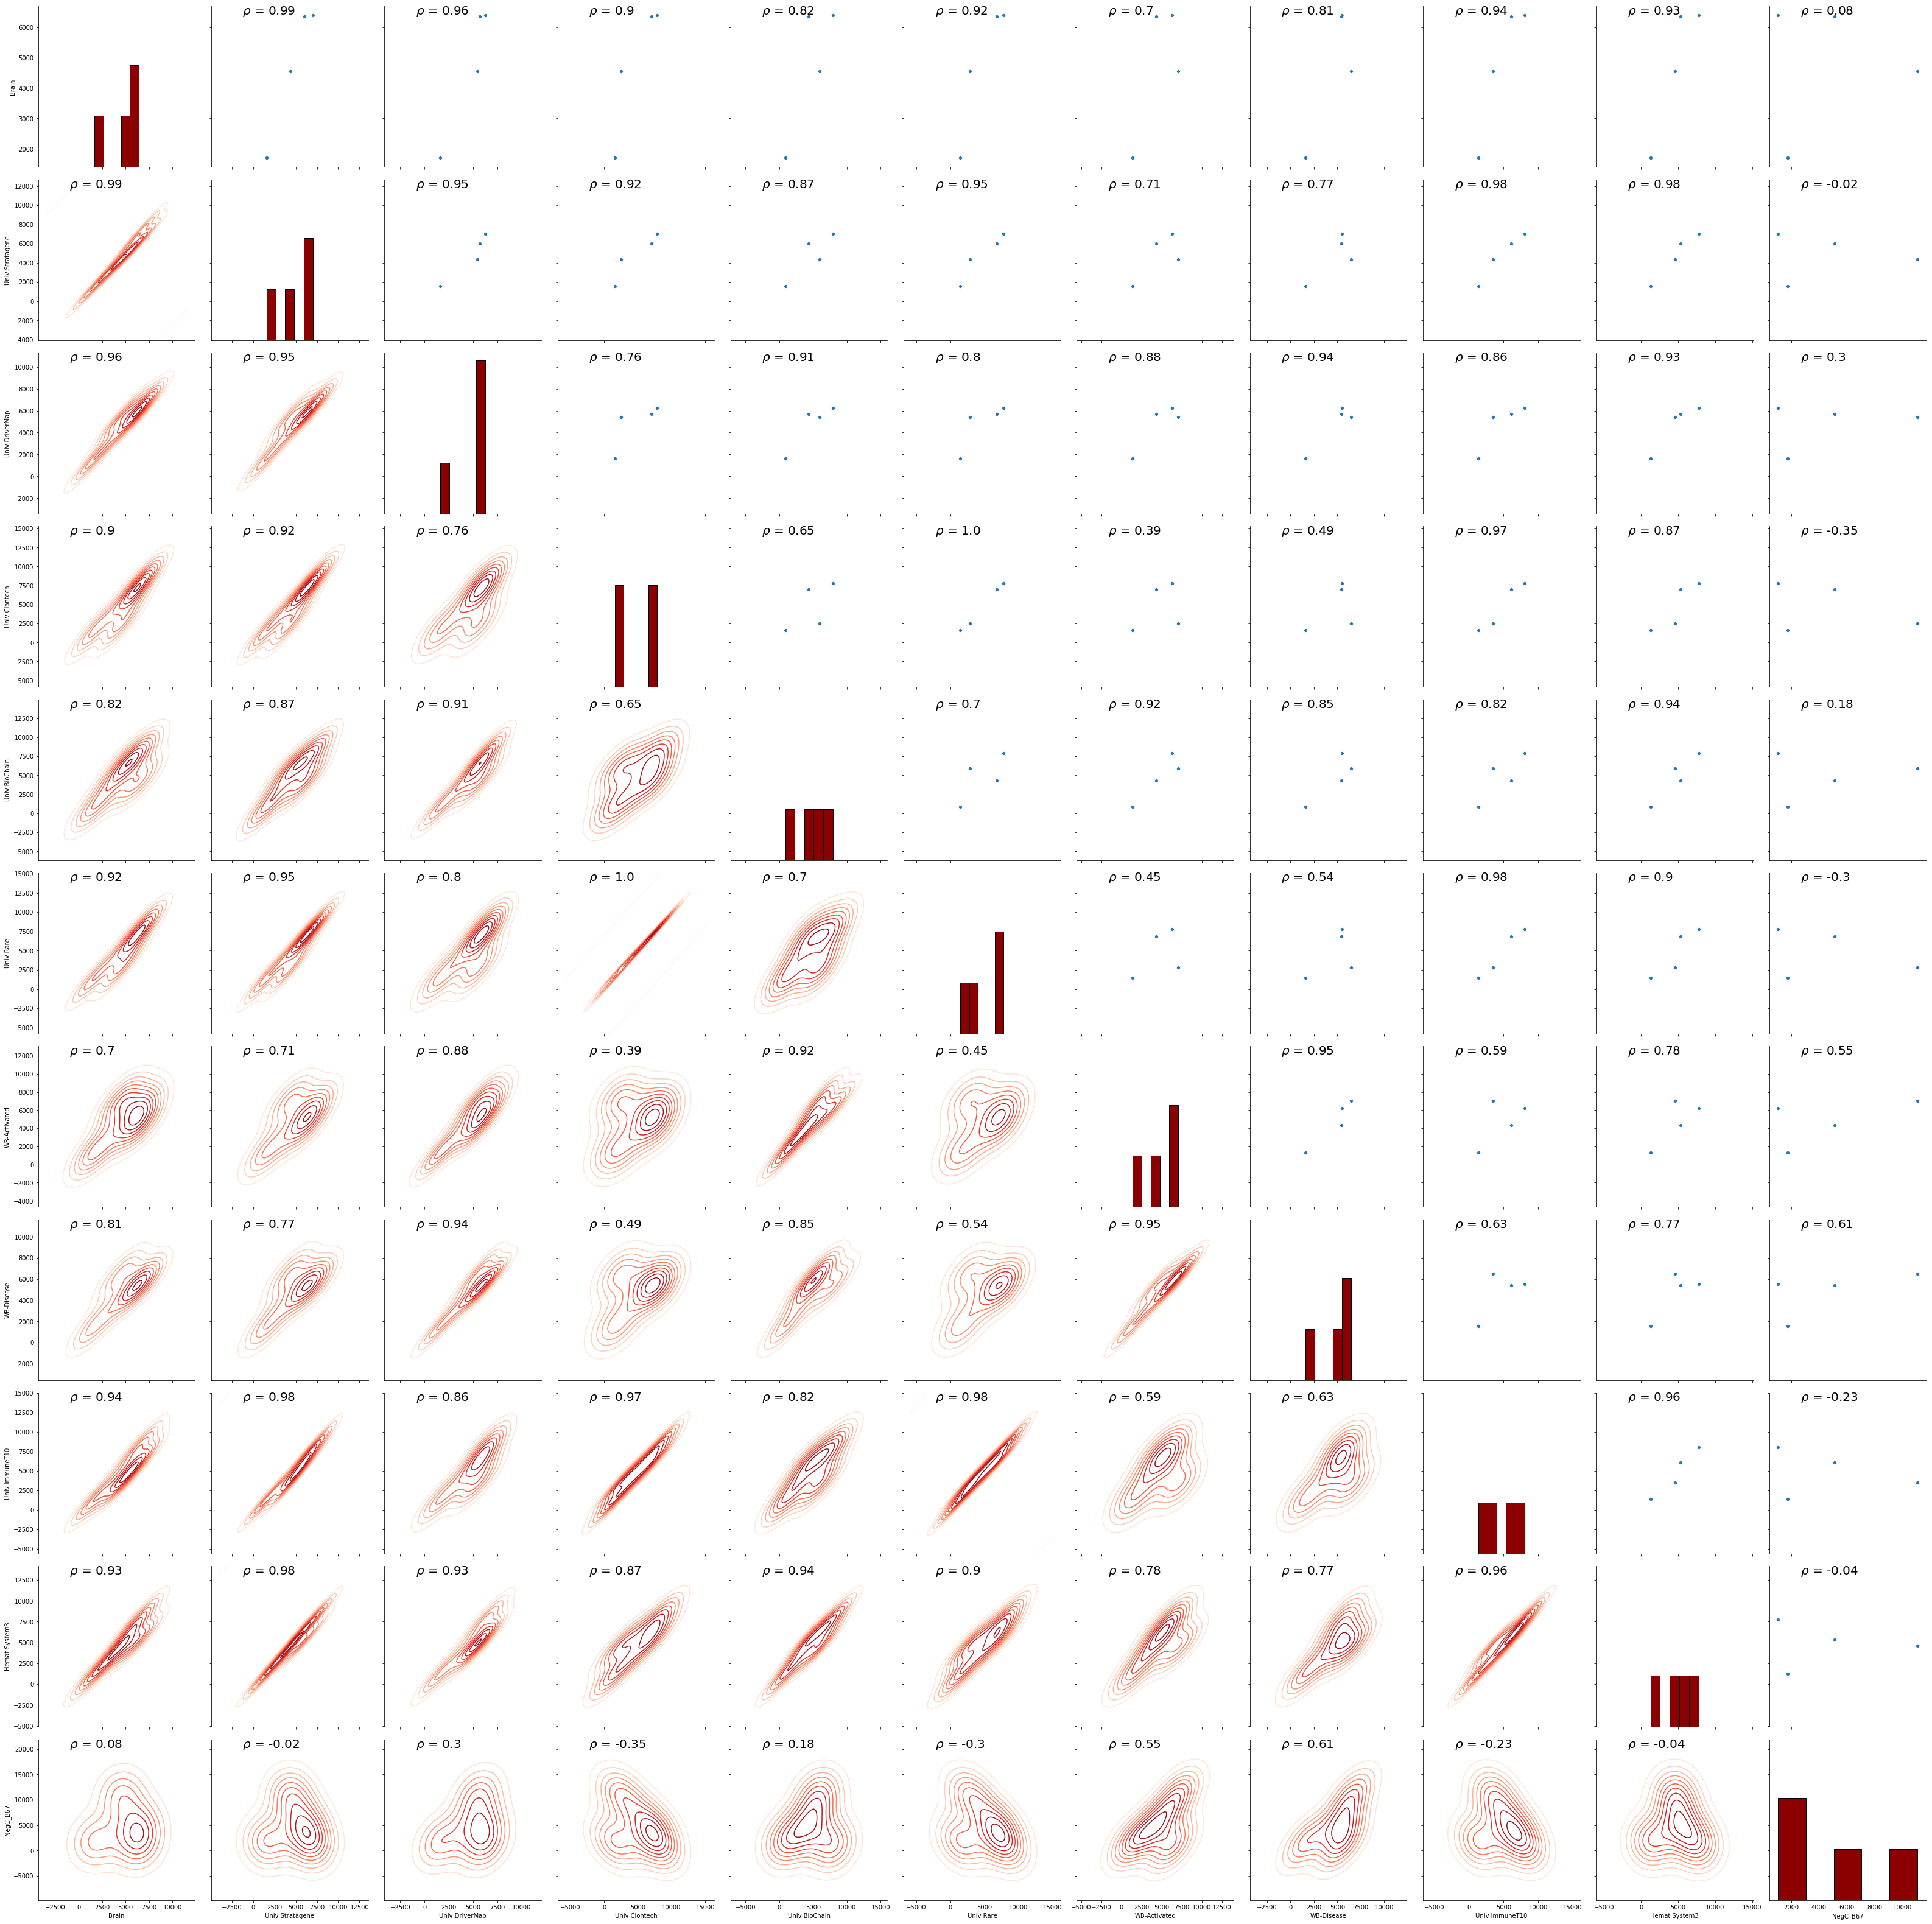

In [22]:
# Create a pair grid instance for Original binned Samples
grid = sns.PairGrid(data= binned_dm_data, height = 4)

# Map the plots to the locations
grid = grid.map_upper(sns.scatterplot, cmap = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 5, edgecolor =  'k', color = 'darkred');
grid.savefig("Figures/grid_Original_bins.png", dpi = 200)

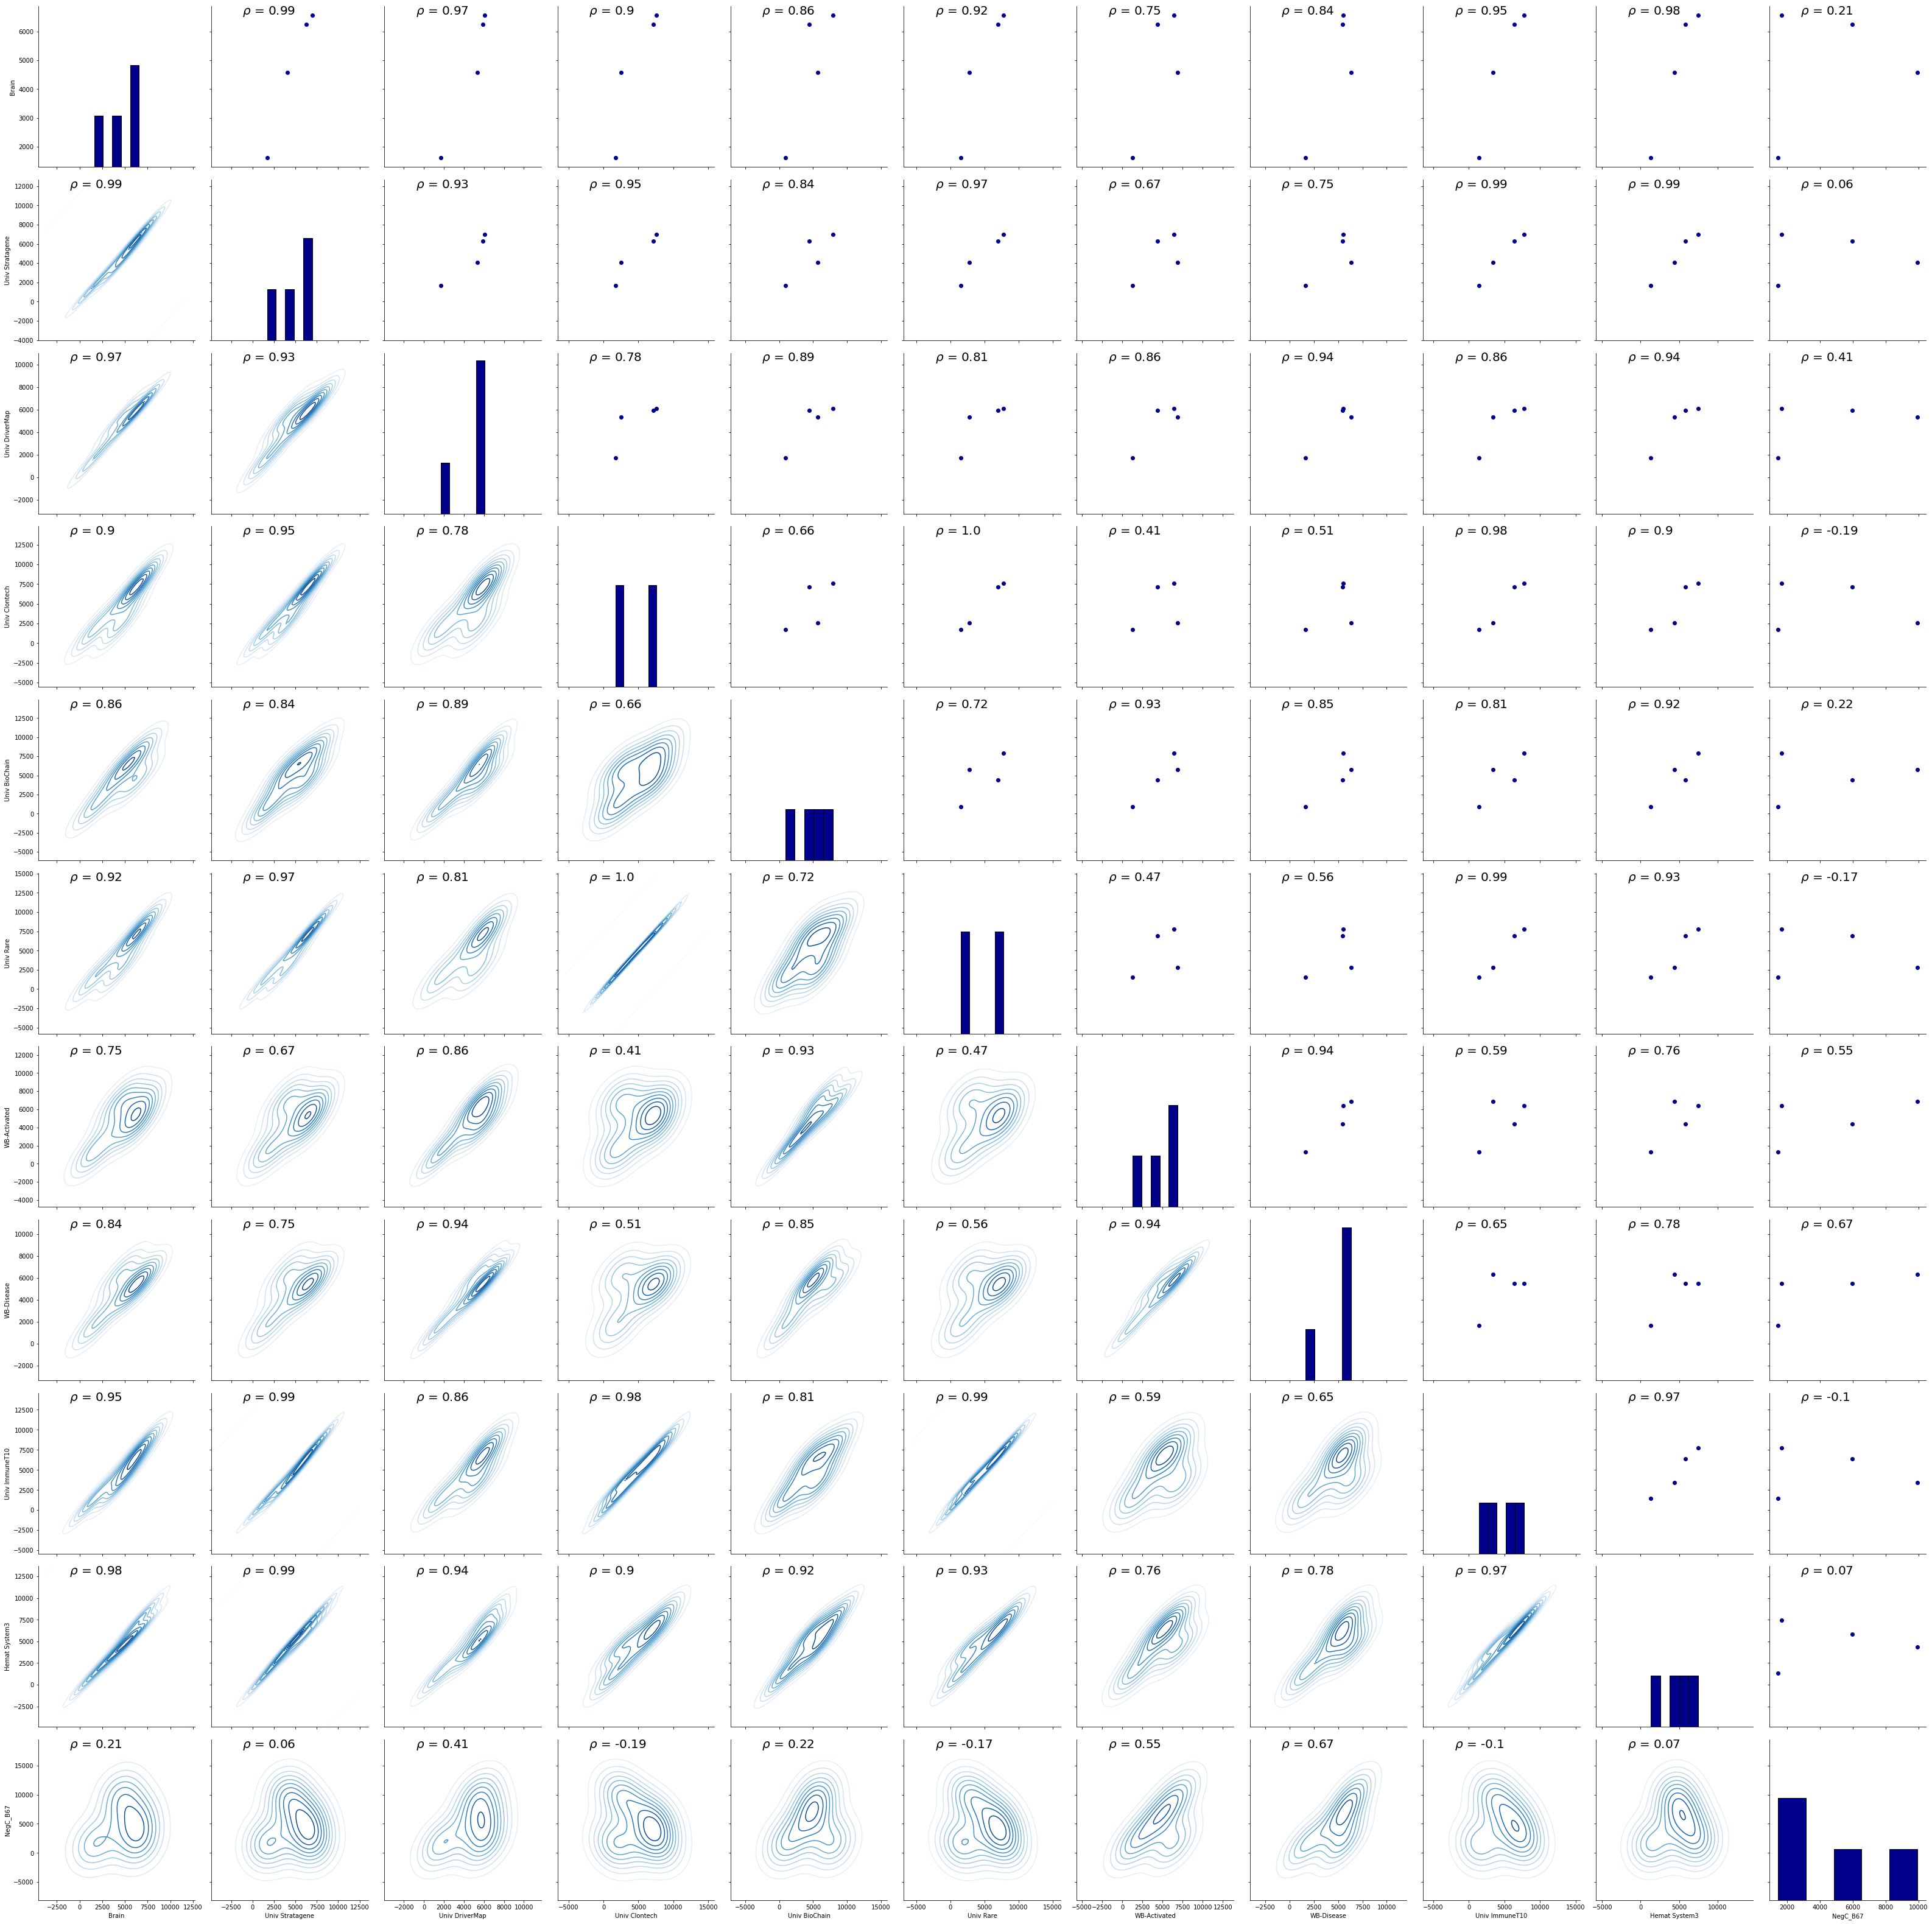

In [23]:
# Create a pair grid instance for BSA binned samples
grid = sns.PairGrid(data= binned_bsa_data, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkblue')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 5, edgecolor =  'k', color = 'darkblue');
grid.savefig("Figures/grid_BSA_bins.png", dpi = 200)

<Figure size 936x576 with 0 Axes>

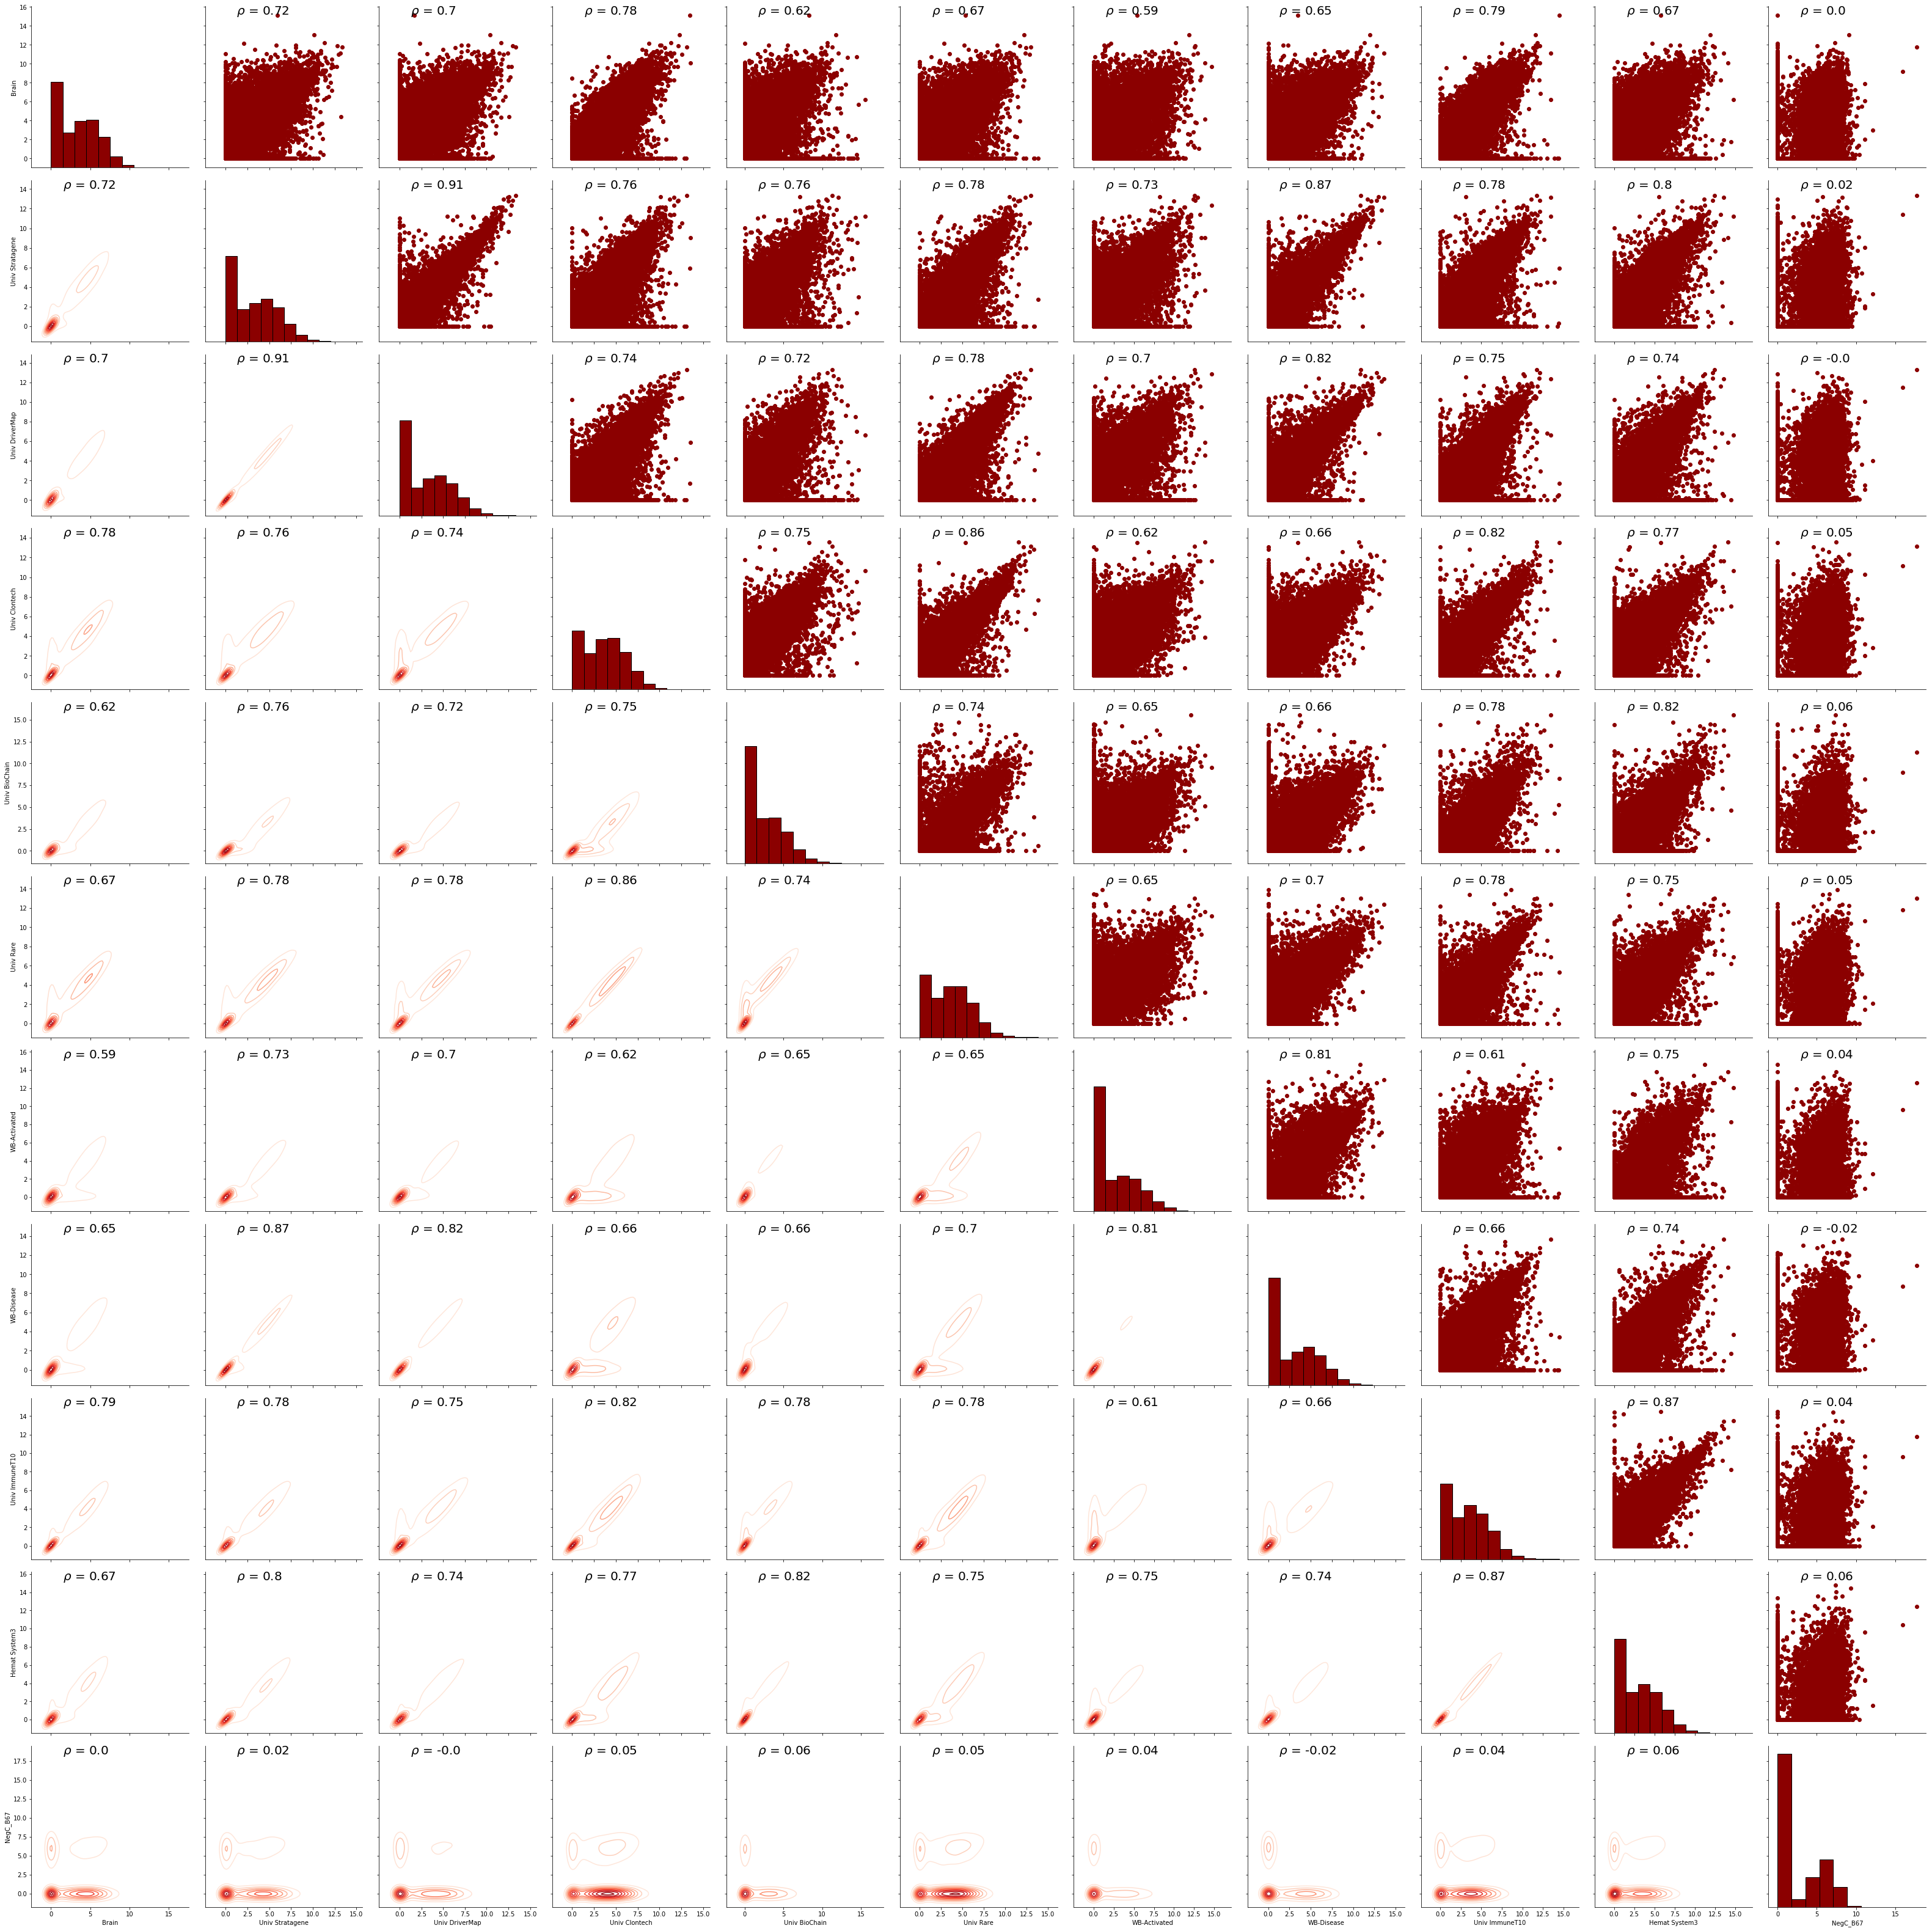

In [24]:
# Create a pair grid instance for Driver Map Logs
fig = plt.figure(figsize=(13,8))
grid = sns.PairGrid(data= driver_map_data_log_df, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k', color = 'darkred');
grid.savefig("Figures/grid_Original_log.png", dpi = 200)

<Figure size 936x576 with 0 Axes>

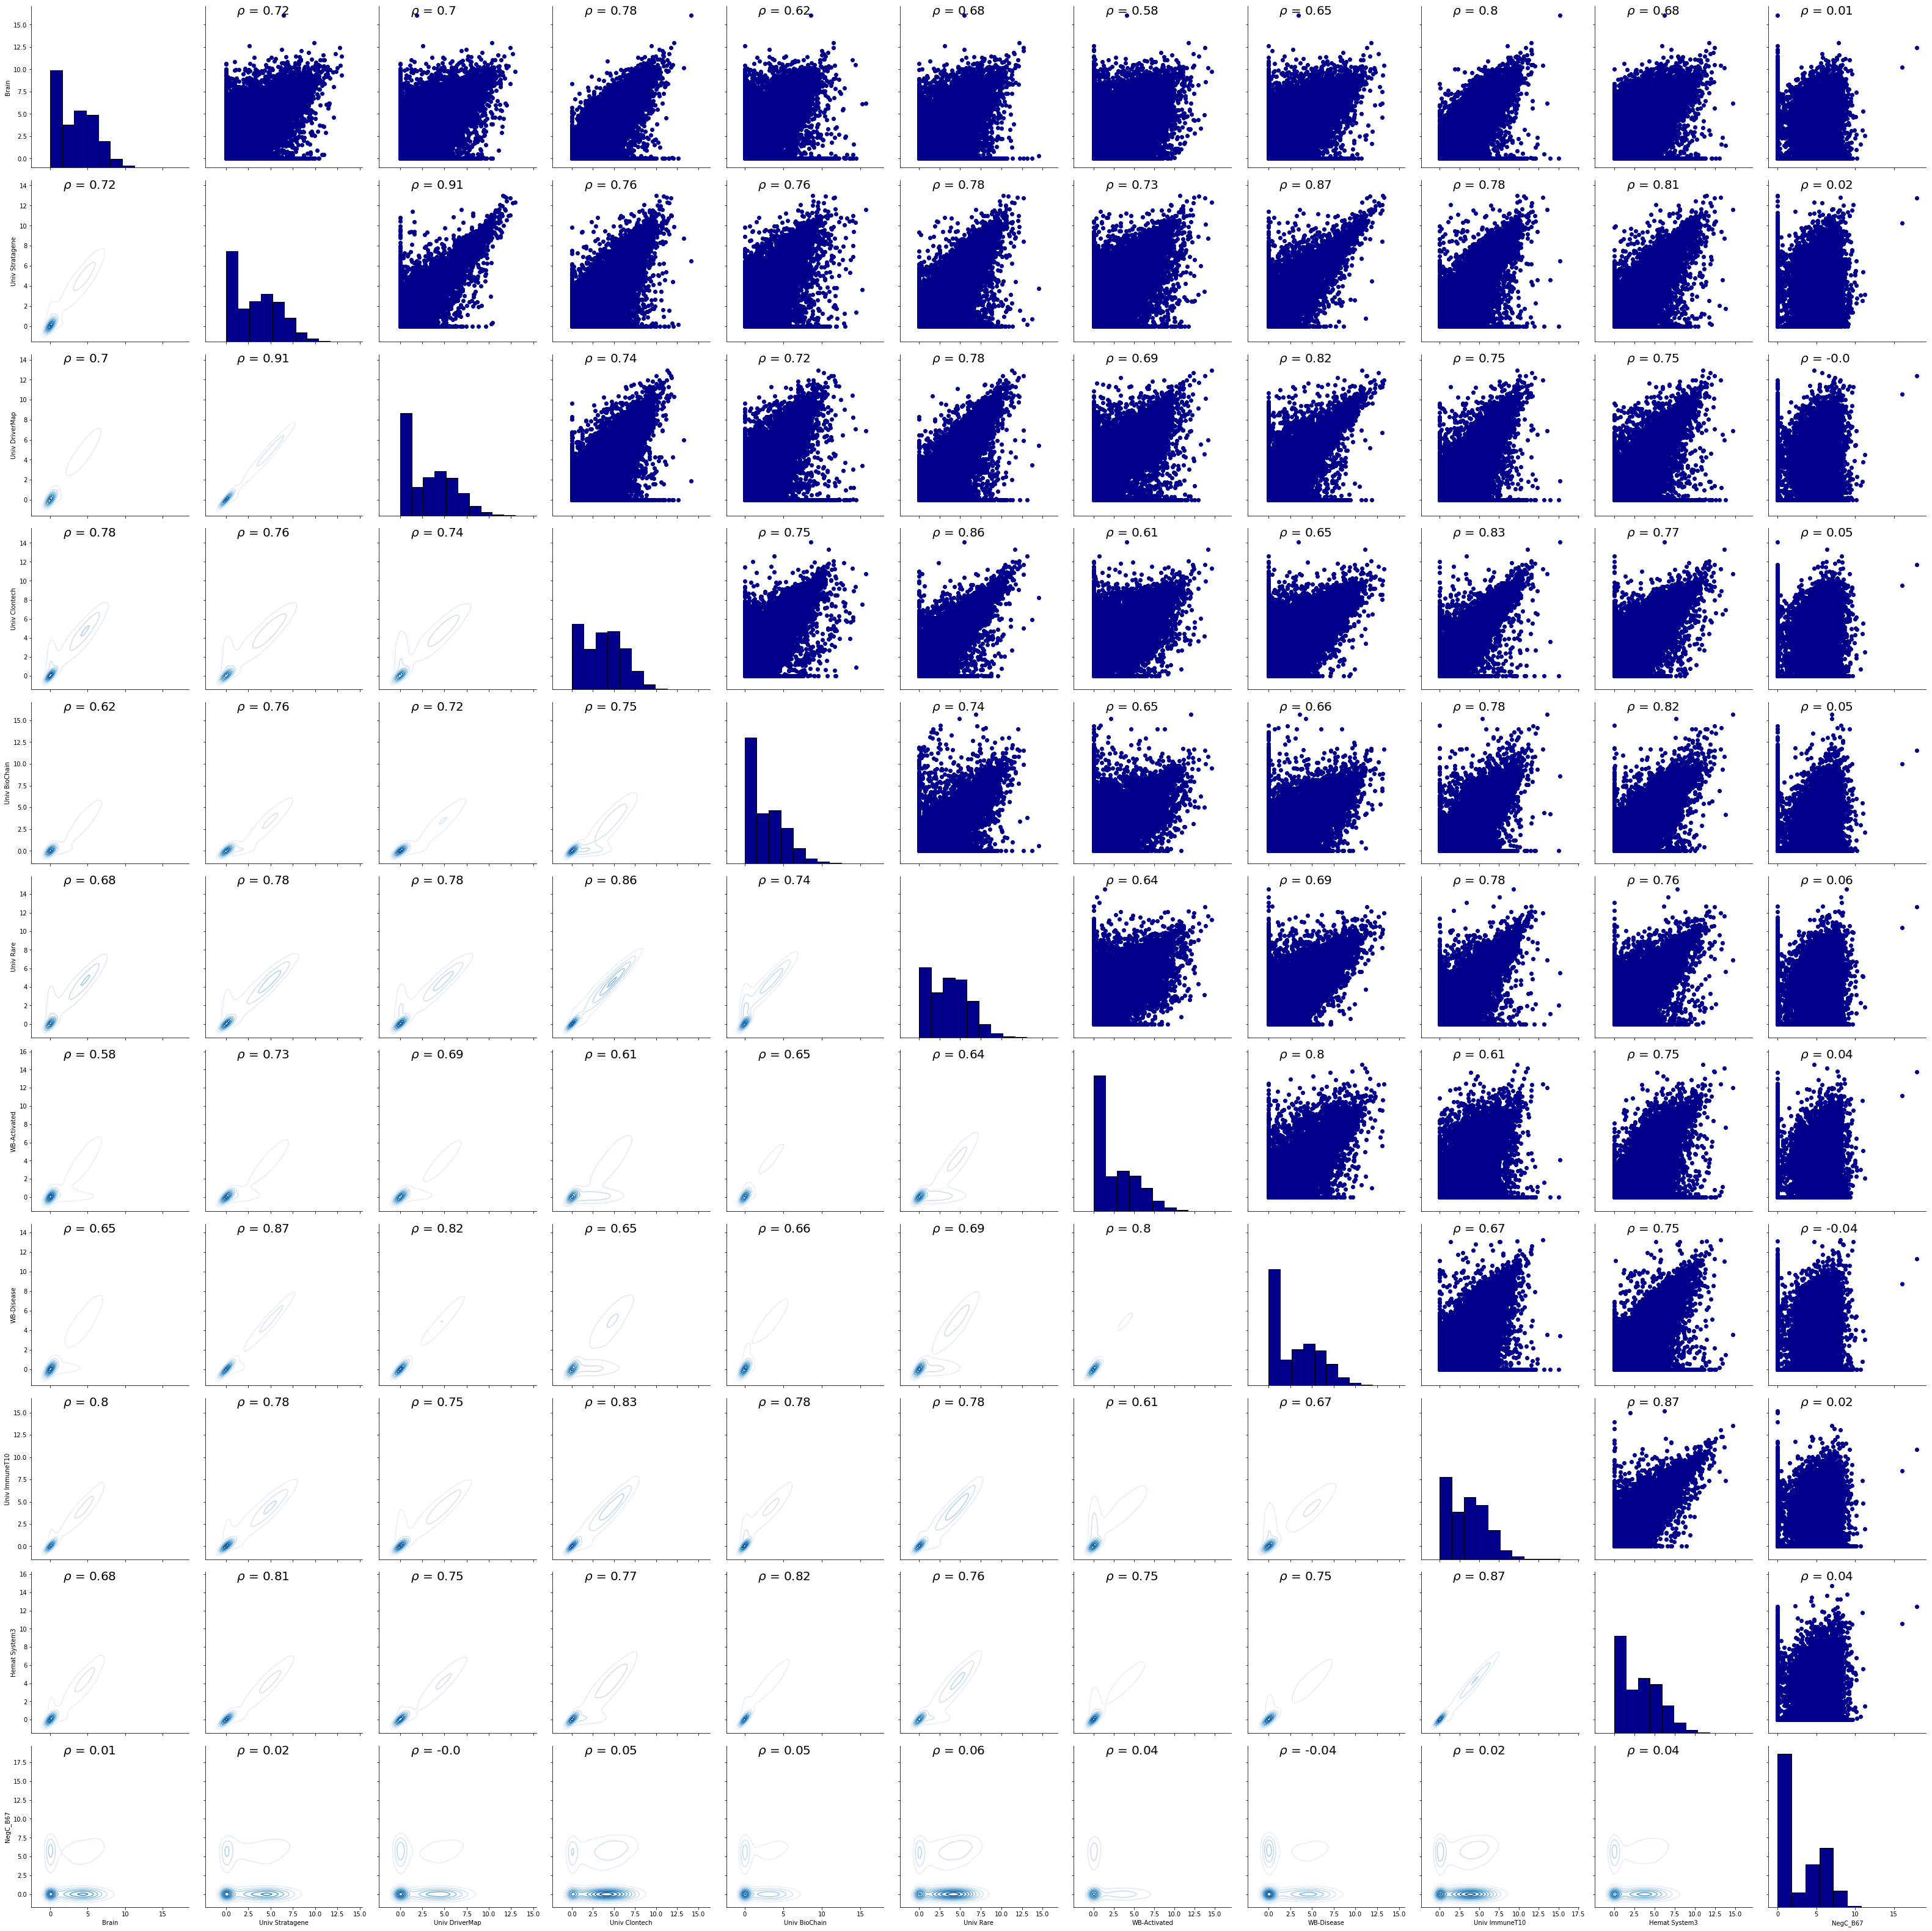

In [25]:
# Create a pair grid instance Driver Map BSA log
fig = plt.figure(figsize=(13,8))
grid = sns.PairGrid(data= driver_map_data_bsa_log_df, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkblue')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_lower(corr)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k', color = 'darkblue');
grid.savefig("Figures/grid_BSA_log.png", dpi = 200)

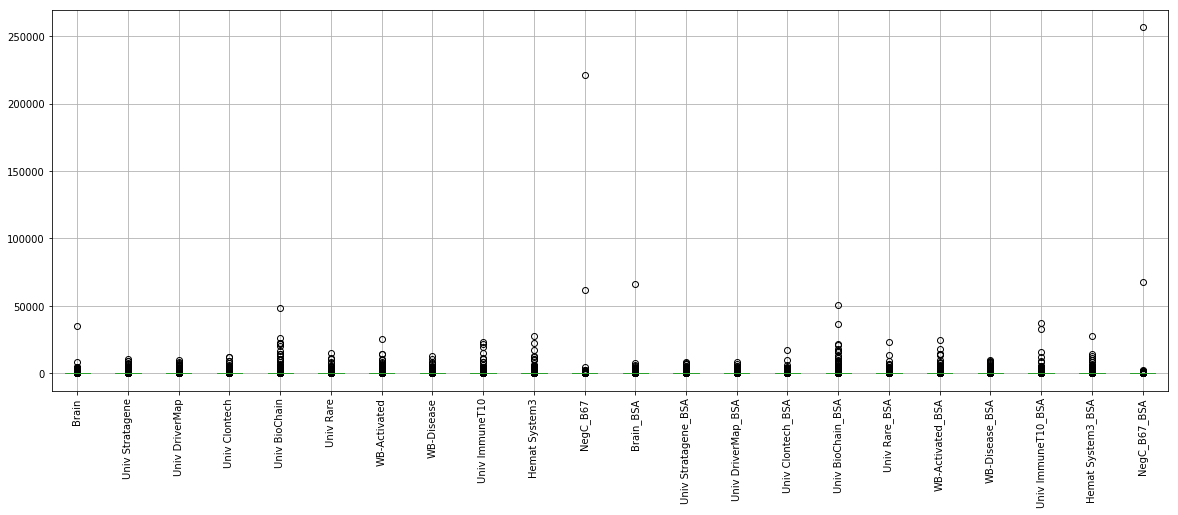

In [26]:
# Box plots to visualize outliers for TPM data

plt.figure(figsize=(20,7))
plt.subplots
driver_map_data_all_df.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures/outliers_TPM.png", dpi = 200)


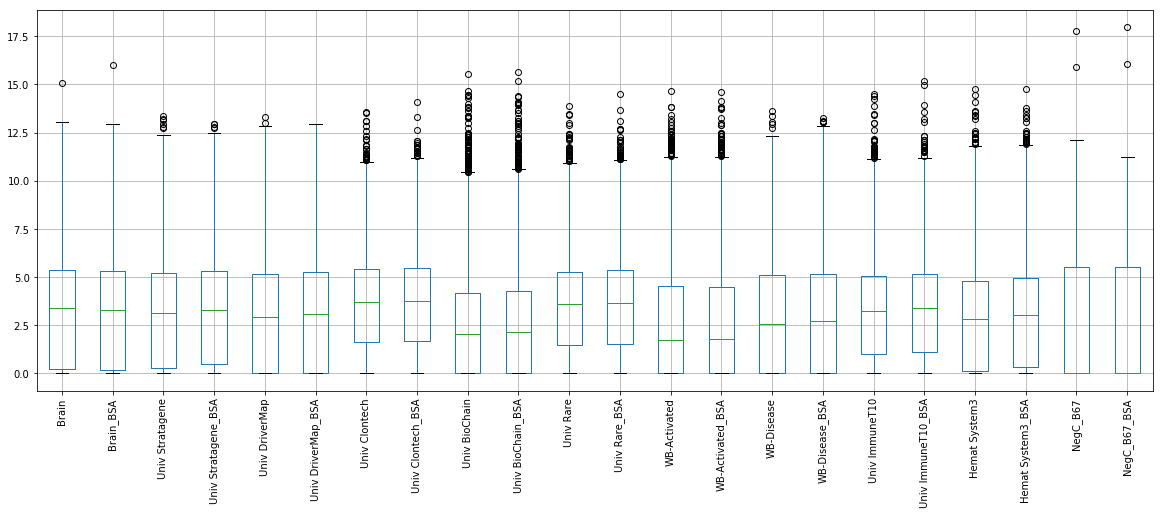

In [27]:
# Box plots to visualize outliers for log data
# a lot more outliers
plt.figure(figsize=(20,7))
plt.subplots
driver_map_data_all_log_df.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures/outliers_log.png", dpi = 200)

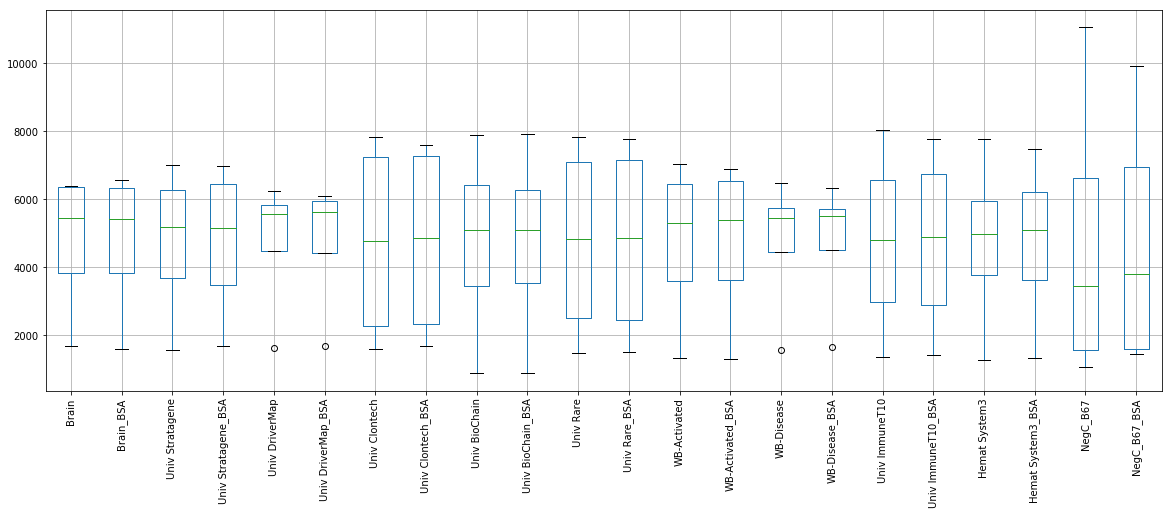

In [28]:
# Box plots to visualize outliers for binned data

plt.figure(figsize=(20,7))
plt.subplots
binned_all_dm_data.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures/outliers_bins.png", dpi = 200)

An Independent Samples t-test compares the means for two groups.


The hypothesis being tested is:

Null hypothesis (H0): u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2
Alternative hypothesis (HA): u1 ? u2, which translates to the mean of sample 1 is not equal to the mean of sample 2

A p-value is the probability of rejecting a null-hypothesis when the hypothesis is proven true. The null hypothesis is a statement that says that there is no difference between two measures.

We are interested in p-values below 0.05(significant).

In [29]:
# t-test for binned data
idx = binned_dm_data.index.intersection(binned_bsa_data.index)
t_test_bins_df = pd.DataFrame(ttest_ind(binned_dm_data.loc[idx], binned_bsa_data.loc[idx], axis=1), 
                              index=['t-stat','p-value'], columns = bin_labels)

#Ttest_indResult(
#    statistic=array([-0.31240597,  0.66835531, -0.17359046, -0.21035294]), 
#    pvalue=array([0.75796591, 0.51154742, 0.86393227, 0.83552046]))
flip_t_test_bins_df = t_test_bins_df.transpose()

flip_t_test_bins_df.describe()
t_test_bins_df

# no real statistical difference

no read       low    medium      high
t-stat   0.222299  0.012655 -0.583412 -0.032445
p-value  0.826336  0.990028  0.566137  0.974439

In [30]:
#t-test for log data
index = ['Original', 'BSA']

idx = driver_map_data_log_df.index.intersection(driver_map_data_bsa_log_df.index)
t_test_df = pd.DataFrame(ttest_ind(driver_map_data_log_df.loc[idx], driver_map_data_bsa_log_df.loc[idx], axis=1), 
                         index=['t-stat','p-value'], columns=gene_name_list)
flip_t_test_df = t_test_df.transpose()

flip_t_test_df = [flip_t_test_df[['p-value']] < 0.05]
#flip_t_test_df.count('False')
flip_t_test_df = flip_t_test_df[0]
#f = flip_t_test_df.drop([flip_t_test_df['p-value'] == False])

np.sum(flip_t_test_df['p-value']) # 2829 genes have statistical significance.
                                    # 468 genes have statistical significance if don't subtract NegC from Columns
#flip_t_test_df.describe()

C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\hamst\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


468

In [31]:
#t-test for TPM data
index = ['Original', 'BSA']

idx = driver_map_data_all_df.index.intersection(driver_map_data_all_df.index)
t_test_df = pd.DataFrame(ttest_ind(driver_map_data_all_df.loc[idx], driver_map_data_all_df.loc[idx], axis=1), 
                         index=['t-stat','p-value'], columns=gene_name_list)
flip_t_test_df = t_test_df.transpose()

flip_t_test_df = [flip_t_test_df[['p-value']] < 0.05]
#flip_t_test_df.count('False')
flip_t_test_df = flip_t_test_df[0]
#f = flip_t_test_df.drop([flip_t_test_df['p-value'] == False])

np.sum(flip_t_test_df['p-value']) # 2829 genes have statistical significance.
#flip_t_test_df.describe()
                                    # 0 genes have statistical significance without subtracting NegC from data

0

In [32]:
# create a new DataFrame where the values for the indices and columns align on the diagonals
# Pearson correlation between two samples

# A value greater than 0 indicates a positive association; that is, as the value of one variable increases, 
# so does the value of the other variable.

pearson_corr = pd.DataFrame(columns = driver_map_data_log_df.columns, index = driver_map_data_log_df.columns)

for col in pearson_corr.columns:
    for idx in pearson_corr.index:
        correl_signif = pearsonr(driver_map_data_log_df[col], driver_map_data_bsa_log_df[idx])
        correl = correl_signif[0]
        pearson_corr.loc[idx, col] = correl

pearson_corr.head()

Brain Univ Stratagene Univ DriverMap Univ Clontech  \
Brain            0.985055        0.703932       0.685166      0.779787   
Univ Stratagene  0.714582        0.984495       0.901619      0.762668   
Univ DriverMap     0.6935        0.900761       0.985971      0.739569   
Univ Clontech    0.761681        0.733442        0.71556      0.978882   
Univ BioChain    0.616622        0.750955       0.719306      0.758968   

                Univ BioChain Univ Rare WB-Activated WB-Disease  \
Brain                0.608851  0.663553     0.571598    0.63225   
Univ Stratagene      0.745379  0.767244     0.720525    0.85743   
Univ DriverMap       0.711451  0.769761     0.682323   0.807881   
Univ Clontech        0.725462  0.833527      0.59425   0.633967   
Univ BioChain        0.985576  0.733464     0.640049   0.647744   

                Univ ImmuneT10 Hemat System3    NegC_B67  
Brain                 0.778649      0.657683  0.00899249  
Univ Stratagene       0.767363      0.788358   0.0156301  
Univ DriverMap        0.734901      0.725544 -0.00632183  
Univ Clontech          0.79806      0.736707    0.032099  
Univ BioChain         0.770006      0.810395   0.0574293

In [33]:

spearman_corr = pd.DataFrame(columns = driver_map_data_log_df.columns, index = driver_map_data_log_df.columns)

for col in spearman_corr.columns:
    for idx in spearman_corr.index:
        correl_signif = spearmanr(driver_map_data_log_df[col], driver_map_data_bsa_log_df[idx])
        correl = correl_signif[0]
        spearman_corr.loc[idx, col] = correl

spearman_corr.head()

Brain Univ Stratagene Univ DriverMap Univ Clontech  \
Brain            0.983845        0.712674       0.694009      0.779071   
Univ Stratagene  0.720873        0.982008       0.896987      0.760973   
Univ DriverMap   0.702673        0.896665       0.983532      0.735542   
Univ Clontech    0.759368        0.730794       0.710008      0.977986   
Univ BioChain    0.652825        0.777158       0.749959      0.774456   

                Univ BioChain Univ Rare WB-Activated WB-Disease  \
Brain                0.647619  0.670487     0.592982    0.64213   
Univ Stratagene      0.774917  0.767047     0.739712   0.851438   
Univ DriverMap       0.746198  0.767633      0.70115   0.803384   
Univ Clontech         0.74396   0.83419     0.592345   0.628023   
Univ BioChain        0.979443  0.762043     0.676324   0.683398   

                Univ ImmuneT10 Hemat System3    NegC_B67  
Brain                 0.788289       0.67499 -0.00116236  
Univ Stratagene       0.770565      0.793567  0.00719248  
Univ DriverMap        0.737463      0.731839  -0.0231506  
Univ Clontech         0.800451      0.737512   0.0259593  
Univ BioChain         0.782896      0.818869   0.0292012

In [34]:

pearson_corr_bins = pd.DataFrame(columns = binned_dm_data.columns, index = binned_dm_data.columns)

for col in pearson_corr.columns:
    for idx in pearson_corr_bins.index:
        correl_signif = pearsonr(binned_dm_data[col], binned_bsa_data[idx])
        correl = correl_signif[0]
        pearson_corr_bins.loc[idx, col] = correl

pearson_corr_bins.head()

Brain Univ Stratagene Univ DriverMap Univ Clontech  \
Brain            0.998761         0.99172       0.961959      0.901411   
Univ Stratagene  0.984625        0.995437       0.917189      0.953863   
Univ DriverMap    0.97022        0.949255       0.996623      0.775667   
Univ Clontech    0.902974        0.918795       0.751205      0.998878   
Univ BioChain    0.835344        0.888033       0.922983      0.684309   

                Univ BioChain Univ Rare WB-Activated WB-Disease  \
Brain                0.840553  0.925354     0.722052   0.815771   
Univ Stratagene      0.818704  0.971132     0.643031   0.724214   
Univ DriverMap       0.880001  0.812283     0.845812   0.928124   
Univ Clontech        0.629222  0.994899     0.375925   0.484222   
Univ BioChain        0.999058   0.73267     0.907671   0.844587   

                Univ ImmuneT10 Hemat System3   NegC_B67  
Brain                 0.946637      0.948532  0.0739636  
Univ Stratagene       0.982757       0.95686 -0.0801883  
Univ DriverMap        0.861964       0.91956   0.293935  
Univ Clontech         0.956538      0.851872  -0.337975  
Univ BioChain         0.847247      0.956517   0.150319

In [66]:
columns = ['Brain', 'Univ Stratagene', 'Univ DriverMap','Univ Clontech', 'Univ BioChain', 
                              'Univ Rare', 'WB-Activated','WB-Disease', 'Univ ImmuneT10', 'Hemat System3', 'NegC_B67']

# ANOVA test to compare means of samples
anova_t_df = pd.DataFrame(columns = driver_map_data_log_df.columns, index = ['Statistic','p-value'])

for col in anova_t_df.columns:
    for idx in anova_t_df.index:
        correl_signif = stats.f_oneway(driver_map_data_log_df,driver_map_data_bsa_log_df)
        statistic = correl_signif[0]
        p_value = correl_signif[1]

df_original_anova = pd.DataFrame([statistic, p_value], columns=columns, index = ['Statistic','p-value'])
df_original_anova

Brain  Univ Stratagene  Univ DriverMap  Univ Clontech  \
Statistic  3.491857        12.289810        6.036402       3.537190   
p-value    0.061679         0.000456        0.014018       0.060015   

           Univ BioChain  Univ Rare  WB-Activated  WB-Disease  Univ ImmuneT10  \
Statistic       3.262481   2.018035      0.047110    3.444939       10.825376   
p-value         0.070890   0.155448      0.828173    0.063453        0.001002   

           Hemat System3      NegC_B67  
Statistic   2.606668e+01  3.880753e+01  
p-value     3.314164e-07  4.726161e-10

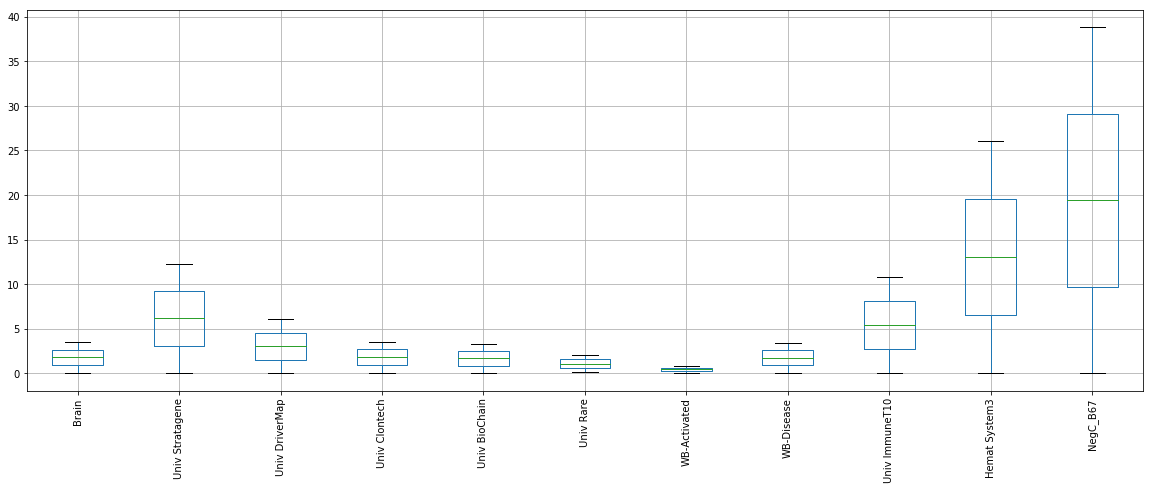

In [69]:
#graphing anova results
plt.figure(figsize=(20,7))
plt.subplots
df_original_anova.boxplot()
plt.xticks(rotation=90)
plt.savefig("Figures/anova_results.png", dpi = 200)

Can possibly look at log10 to clean up even more

with np.errstate(divide='ignore'):
    driver_map_data_all_log10_df = np.log10(driver_map_data_all_df)
replace negative values with 0    
driver_map_data_all_log10_df[driver_map_data_all_log10_df < 0 ] = 0
repleca NaN values  with 0
driver_map_data_all_log10_df[driver_map_data_all_log10_df.isna() ] = 0

Box plots to visualize outliers for log data
a lot more outliers

plt.figure(figsize=(20,7))
plt.subplots
driver_map_data_all_log10_df.boxplot()
plt.xticks(rotation=90)